# Training Models

## Linear Regression
Nothing to code

## The Normal Equation

In [1]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

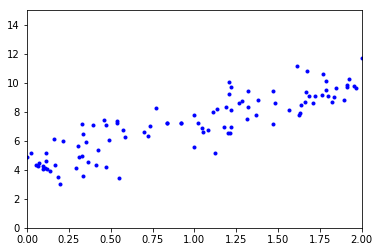

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [31]:
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.35027587],
       [ 2.89224947]])

In [21]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)

In [22]:
y_predict

array([[  4.35027587],
       [ 10.13477481]])

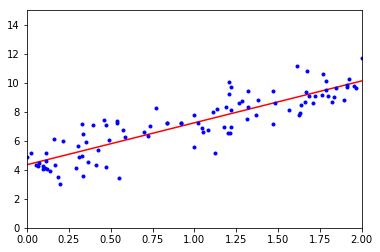

In [27]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([ 4.35027587]), array([[ 2.89224947]]))

## Computation Complexity
Nothing to code

## Gradient Descent

### Batch Gradient Descent

\\[
\mathrm{MSE(\mathbf{X},h_{\theta})}=\frac 1m \sum_{i=1}^m(\theta^T\centerdot \mathbf{x^{(i)}}-y^{(i)})^2
\\]
\\[\
\frac \partial{\partial \theta_j}\mathrm{MSE(\theta)}=\frac 2m \sum_{i=1}^m(\theta^T\centerdot\mathbf{x^{(i)}}-y^{(i)})x_j^{(i)}
\\]
\\[
\nabla_\theta\mathrm{MSE(\theta)}=\begin{pmatrix}
        \frac \partial{\partial \theta_0}\mathrm{MSE(\theta)}  \\      
        \frac \partial{\partial \theta_1}\mathrm{MSE(\theta)}   \\
        \vdots \\
        \frac \partial{\partial \theta_n}\mathrm{MSE(\theta)}
        \end{pmatrix}
        =\frac 2m \mathbf{X^T}\centerdot(\mathbf{X^T\centerdot\theta}-\mathbf{y})
\\]
\\[
\theta^{next \, step}=\theta-\eta\nabla_{\theta}\mathrm{MSE(\theta)}
\\]

**Note**: $m$ is the number of instances,$n$ is the numbe$\mathbf{x^{(i)}}$ is a vector of all the feature values of the $i^{th}$ instance, $\mathbf{X}$ is a matrix containing all the feature values(excluding labels) of all instances.

In [32]:
#implementation of BGD
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)
for interation in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

**Learning rate** $\eta$ is important,you can use grid search to find a good learining rate.

In [33]:
theta

array([[ 4.35027587],
       [ 2.89224947]])

### Stochastic Gradient Descent

In [45]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1] #pay attention to this
        yi=y[random_index:random_index+1] #pay attention to this
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

In [46]:
theta

array([[ 4.33546363],
       [ 2.89779429]])

In [49]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [50]:
sgd_reg.intercept_,sgd_reg.coef_

(array([ 4.36285662]), array([ 2.8951047]))

### Mini-batch Gradient Descent

In [44]:
xi.T.dot(yi)

ValueError: shapes (2,) and (1,) not aligned: 2 (dim 0) != 1 (dim 0)